# Centrality

In [1]:
cd ~/thesis

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Import libraries

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

# Modify eliorc's implementation
from eliorc_mod.node2vec import Node2Vec
from gensim.models import Word2Vec

from main_utils import *
from plot_utils import *

/tmp/ipykernel_535/702283646.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Stochastic Block Model

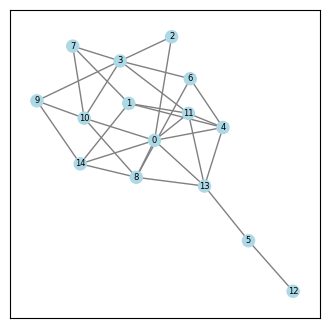

In [3]:
initial_graph = nx.erdos_renyi_graph(15, 0.25, seed=42)
plot_graph(initial_graph)

In [4]:
bet_centr_dict = nx.betweenness_centrality(initial_graph)
bet_centr_df = pd.DataFrame(list(bet_centr_dict.items()), columns=['node_id', 'centrality'])
bet_centr_df.sort_values(by='centrality', ascending=False).reset_index(drop=True)

,node_id,centrality
0,13,0.272894
1,0,0.180952
2,5,0.142857
3,3,0.126374
4,8,0.094872
5,11,0.094139
6,10,0.076190
7,4,0.067399
8,14,0.056410
9,1,0.053846


In [16]:
?? nx.betweenness_centrality_subset

Signature:
 nx.betweenness_centrality_subset(
    G,
    sources,
    targets,
    normalized=False,
    weight=None,
)
Source:   
def betweenness_centrality_subset(G, sources, targets, normalized=False, weight=None):
    r"""Compute betweenness centrality for a subset of nodes.

    .. math::

       c_B(v) =\sum_{s\in S, t \in T} \frac{\sigma(s, t|v)}{\sigma(s, t)}

    where $S$ is the set of sources, $T$ is the set of targets,
    $\sigma(s, t)$ is the number of shortest $(s, t)$-paths,
    and $\sigma(s, t|v)$ is the number of those paths
    passing through some  node $v$ other than $s, t$.
    If $s = t$, $\sigma(s, t) = 1$,
    and if $v \in {s, t}$, $\sigma(s, t|v) = 0$ [2]_.


    Parameters
    ----------
    G : graph
      A NetworkX graph.

    sources: list of nodes
      Nodes to use as sources for shortest paths in betweenness

    targets: list of nodes
      Nodes to use as targets for shortest paths in betweenness

    normalized : bool, optional
      If True the b

In [6]:
max_bet_cent_node = max(bet_centr_dict, key=bet_centr_dict.get)

In [7]:
max_bet_cent_node

13

In [8]:
bet_centr_dict

{0: 0.18095238095238098,
 1: 0.053846153846153856,
 2: 0.003663003663003663,
 3: 0.1263736263736264,
 4: 0.0673992673992674,
 5: 0.14285714285714288,
 6: 0.01684981684981685,
 7: 0.01868131868131868,
 8: 0.09487179487179487,
 9: 0.014652014652014652,
 10: 0.07619047619047621,
 11: 0.09413919413919414,
 12: 0.0,
 13: 0.2728937728937729,
 14: 0.05641025641025641}

In [9]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 5, removal_process='betweenness_centrality')

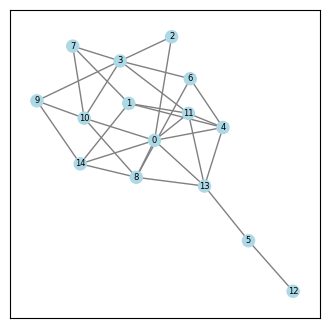

In [10]:
plot_graph(initial_graph)

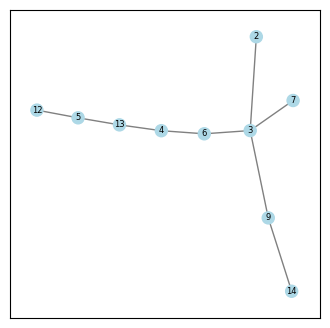

In [11]:
plot_graph(graph)

In [12]:
remove_nodes_edges_dict

{0: [(0, 2), (0, 4), (0, 8), (0, 10), (0, 11), (0, 13), (0, 14)],
 8: [(8, 6), (8, 10), (8, 13), (8, 14)],
 11: [(11, 1), (11, 3), (11, 4), (11, 13)],
 1: [(1, 4), (1, 7), (1, 14)],
 10: [(10, 3), (10, 7), (10, 9)]}

### PPI

In [13]:
initial_graph, group_df = mat_load_func('datasets/PPI/PPI.mat')
initial_graph.name = 'PPI'

In [14]:
advanced_info(initial_graph)

Graph Information:
Number of nodes: 3890
Number of edges: 38739
Density: 0.005121425469371459
Is connected: False
Average clustering coefficient: 0.14644876266464119
Directed: False


In [5]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 128, removal_process='betweenness_centrality')

KeyboardInterrupt: 

In [ ]:
advanced_info(graph)